# Geopandas

**GeoPandas** es una librería que brinda soporte para la visualización datos geográficos usando **Pandas**. Implementa dos tipos de datos derivados de **pandas.Series** y **pandas.DataFrame** (**GeoSeries** y **GeoDataFrame** respectivamente). Las operaciones geométricas soportadas por **Geopandas** son cartesianas. 

Inicialmente debemos instalar los paquete **geopandas** y **libspatialindex-dev**, también se debe instalar el paquete **descartes** ya que se requiere para algunas diagramaciones:

In [1]:
!sudo apt install libspatialindex-dev
!pip install geopandas
!pip install descartes

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 7 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 1s (854 kB/s)
debconf: unable to initialize frontend: Dialog
debc

**gpd.read_file** permite la carga de conjuntos de datos a través de la libería **fiona**. **Fiona** soporta una gran cantidad de formatos, entre ellos **GeoJSON**. 

In [2]:
!pip install Fiona==1.8.4
!apt-get install ca-certificates

     |████████████████████████████████| 17.9MB 4.5MB/s 
  Found existing installation: Fiona 1.8.6
    Uninstalling Fiona-1.8.6:
      Successfully uninstalled Fiona-1.8.6
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ca-certificates is already the newest version (20180409).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


Es necesario instalar el paquete **pysal** y **mapclassify** para que el siguiente ejemplo funcione, ya que es usado al momento de generar el diagrama:

In [3]:
!pip install pysal==1.14.4.post2
!pip install mapclassify==2.0.1

     |████████████████████████████████| 17.9MB 4.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/43/33/20/65692f75cb30834752a6cb566069d5e98ab209392f24bf5466
Successfully built pysal
  Stored in directory: /root/.cache/pip/wheels/64/65/1d/1de1fa57972cd410029dd8d07ffcca424e81598d427684096e
Successfully built mapclassify


La función **sjoin** hace uso del paquete **rtree**, por lo que debemos instalarlo antes del llamado a la función:

In [4]:
!pip install rtree

Importamos las librerias habituales **numpy**, **matplotlib.pyplot** y **pandas**. Adicionalmente cargamos otras para manejo de datos georeferenciado como  **geopandas**,   **ogr**, **shapely**, y establecemos **matplotlib inline** para poder visualizar las gráficas de manera directa en el notebook::

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import IPython.display as display
import ogr                           # GDAL/OGR
import shapely                       # Herramientas para manipulación geométrica
from shapely.geometry import *

%matplotlib inline

Listamos todas las librerías del notebook para comprobar las versiones de las librerias previamente instaladas:


In [0]:
!pip list

##1. GeoSerie

Una **GeoSerie** es básicamente un vector en el cual cada entrada es un objeto de tipo figura geométrica. La entrada puede consistir de un único objeto geométrico (un poligono por ejemplo) o de multiples objetos geométricos (las cuales en general deben ser del mismo tipo).

`Geopandas` soporta los siguientes tipos de objetos geométricos:

- Points / Multi-Points 
- Lines / Multi-Lines 
- Polygons / Multi-Polygons 

Cada uno de estos objetos son a su vez objetos de la librería `shapely`

[Documentación](https://shapely.readthedocs.io/en/latest/manual.html#geometric-objects)




Para entender el funcionamiento de una **geoserie**, lo ilustraremos con el ejemplo más sencillo. Definimos inicialmente una figura geométrica **p1** del tipo **Poligon**, la cual es definida mediante la serie de puntos en el plano cartesiano que dan forma al polígono, seguidamente se define la **geoserie** enviando en este caso un único parametro el cual es el objeto o figura que deseamos dibujar, que para este ejemplo es el poligono previamente definido:

In [0]:
p1 = Polygon([(0, 0),(0.5, 0.2), (1, 0), (0.8, 0.5), (1, 1), (0.1, 0.8)])

g = gpd.GeoSeries(p1)


Ya definida la **geoserie**, la podemos dibujar con el llamado a la función **plot()**, la cual nos dibujará el poligono con el que se definió la **geoserie**

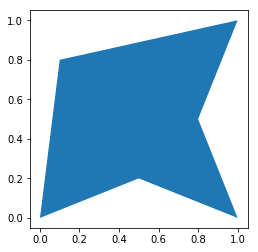

In [7]:
g.plot()

Podemos, como se dijo, definir la **geoserie** con más de un objeto geométrico, en el siguiente caso definimos tres objetos geométricos de tipo polígono y con ellos creamos la **geoserie** que posteriormente se diagrama. La función **plot()** puede recibir parametros para la personalización de la gráfica, en este caso por ejemplo definimos el mapa de colores a usar:

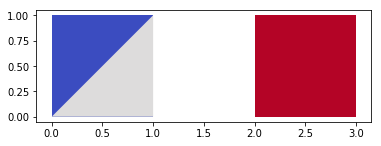

In [10]:
p1 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
g = gpd.GeoSeries([p1, p2, p3])
g.plot(cmap='coolwarm')

De esta manera, es posible por ejemplo diagramar el mapa de una región geográfica, definiendo el poligono o conjunto de poligonos que le dan forma.

###Atributos

Las **geoseries** poseen ciertos atributos que permiten la obtención de algunas de sus características:



**area**: retorna el área proyectada de cada una de las figuras de la **geoserie**, con la siguiente línea de código obtenemos el área de las tres figuras que conforman la **geoserie**


In [11]:
g.area

0    1.0
1    0.5
2    1.0
dtype: float64

**bounds**: Define los limites de los ejes del plano cartesiano en los cuales se dibuja cada figura de la **geoserie**:

In [12]:
g.bounds

,minx,miny,maxx,maxy
0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,1.0
2,2.0,0.0,3.0,1.0


**geom_type**: corresponde al tipo de figura geometrica de cada uno de los objetos geométricos que componen la **geoserie**, es este caso **Polygon**:


In [13]:
g.geom_type

0    Polygon
1    Polygon
2    Polygon
dtype: object

**centroid**: Retorna las coordenadas del centro de cada figura

In [14]:
g.centroid

0                                  POINT (0.5 0.5)
1    POINT (0.6666666666666666 0.3333333333333333)
2                                  POINT (2.5 0.5)
dtype: object

### Métodos básicos

**distance**: retorna la distancia mínima entre dos elementos u objetos geometricos, la forma de uso es **obj1.distance(obj2)**, el siguiente ejemplo retorna la distancia mínima que hay entre los polígonos **p1** y **p3**:

In [15]:
# Distancia entre elementos
print(p1.distance(p3))

1.0


El método **distance** también se puede llamar desde la **geoserie** y enviando como parámetro uno de los objetos de la **geoserie**, de esta manera nos retorna la distancia mínima entre cada uno de los objetos de la **geoserie**, y el objeto con el cual se llamó la función, en el ejemplo vemos la distancia mínima entre cada objeto de la **geoserie** y el objeto **p3**:

In [16]:
print(g.distance(p3))

0    1.0
1    1.0
2    0.0
dtype: float64


**representative_point**: retorna un punto representativo que se garantiza se encuentra dentro de la geometría

In [17]:
g.representative_point()

0     POINT (0.5 0.5)
1    POINT (0.75 0.5)
2     POINT (2.5 0.5)
dtype: object

**centroid.plot**: Diagrama en el plano cartesiano el **centroid** de cada figura geométrica que conforma la **geoserie**.

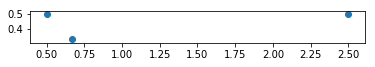

In [18]:
g.centroid.plot()

###Pruebas de relación

**geom_almost_equals**: Es una función de la **geoserie**, recibe como parámetro un objeto geométrico y retorna **True** o **False** dependiendo si hay o no semejanza geométrica entre cada uno de los objetos de la **geoserie** y el objeto enviado como parámetro, el siguiente código compara el objeto **p3** con cada uno de los objetos de la geoserie **g**:

In [19]:
g.geom_almost_equals(p3)

0    False
1    False
2     True
dtype: bool

**contains**: Regresa verdadero si una figura está contenida en otra


In [20]:
p1.contains(p2)

True

In [21]:
p2.contains(p1)

False

**intersects**: Regresa verdadero si una figura está intersectada con otra

In [22]:
p2.intersects(p1)

True

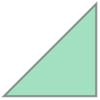

In [23]:
p2

## 2. GeoDataFrame

Un **GeoDataFrame** es una estructura de datos tabular que contiene una columna de tipo **GeoSeries**. 

Los **GeoDataFrames** siempre contienen una columna que se denomina geometría (`geometry`). Cuando una operación espacial es aplicada al **GeoDataFrame**, este comando siempre actuará sobre la columna `geometry`. La columna `geometry` podría tener un nombre diferente, el cual puede ser consultado usando **gdf.geometry.name**.

A continuación se presenta un ejemplo usando **GeoDataFrame**:

Iniciamos leyendo el archivo: **naturalearth_lowres** con la funcion **read_file** del módulo **geopandas** y visualizando su contenido con la funcion **head()**:

In [24]:
path = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(path)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


La variable **world**  entonces apuntará a un **geodataframe** en el que la columna geometry representa el poligono correspondiente a cada país, por ejemplo, el elemento de la fila 35 para esta columna, corresponde al poligono que dibuja a Colombia, como vemos en la siguiente línea:

In [0]:
col = world[world['name']=='Colombia']['geometry']

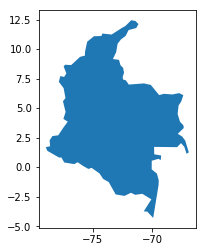

In [26]:
col.plot()

y si llamamos a la función **plot()** desde el **geodataframe**, este se dibujará completo, (la diagramación de todos los poligonos de la columna geometry dará como resultado la gráfica de todos los paises en un solo diagrama):

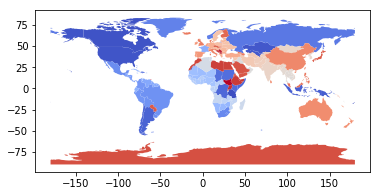

In [27]:
world.plot(cmap='coolwarm')

**EJEMPLO:** Realizar el diagrama de los centroid de cada pais del mundo.

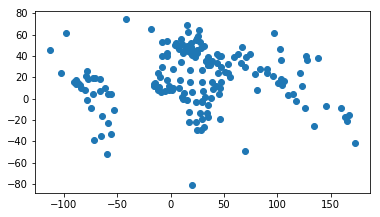

In [28]:
world.centroid.plot()

El nombre de la columna que contine los polígonos a dibujar, se puede obtener con el llamado al atributo **name** como se muestra en la siguinete línea de código, para este caso el nombre es igualmente geometry:

In [29]:
world.geometry.name

'geometry'

Es posible cambiar la columna que se usa para realizar el diagrama, para ello simplemete usamos la función **set_geometry()** enviando el nombre de la columna que queremos usar. para ejemplificar esto vamos a crear una nueva columna llamada **centroid_column** la cual contendra los **centroid** de cada poligono:

In [31]:
world['centroid_column'] = world.centroid
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,centroid_column
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",POINT (163.8531646445803 -17.31630942638261)
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...,POINT (34.75298985475595 -6.257732428506092)
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...,POINT (-12.13783111160779 24.29117296020862)
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974...",POINT (-98.14238137209696 61.46907614534886)
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49....",POINT (-112.5994359115045 45.70562800215186)


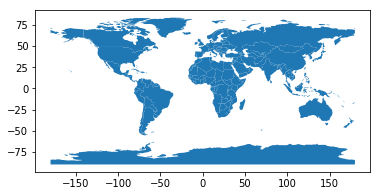

In [32]:
world.plot()

Y ahora modificamos el valor **geometry** del geodataframe, para establecerlo con el nombre de la columna recien creada:

In [33]:
world = world.set_geometry('centroid_column')
print(world.geometry.name) 

centroid_column


De esta manera, al diagramar nuevamente el **geodataframe**, no se graficarán los poligonos, sino en cambio se dibujarán los correspondientes **centroid**

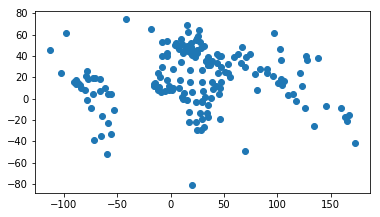

In [34]:
world.plot()

Adicionalmente nos permite hacer una selección de índices basado en coordenadas (`.cx`)

Para el ejemplo retomamos el **geodataframe** devuelto por **geopandas** con **naturalearth_lowres**:

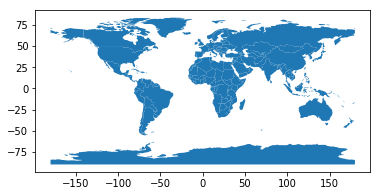

In [35]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.plot()

Y creamos un nuevo **geodataframe** que corresponde a los paises úbicados en el hemisferio sur

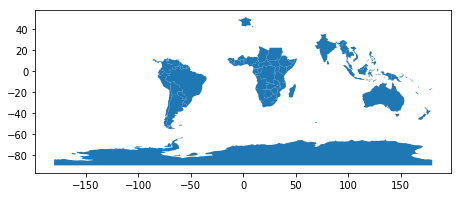

In [36]:
hemisferio_sur = world.cx[:, :10]

hemisferio_sur.plot(figsize=(10, 3));

### Otros datases de ejemplo

Podemos ver los **geodataframes** que están disponibles en **geopandas** mediante el llamado a **gpd.datasets.available**:

In [37]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

Entre ellos estan los geodataframes **naturalearth_cities**,  **naturalearth_lowres** y **nybb**, podemos entonces usar por ejemplo el geodataframe **nybb** para ver la información y diagrama correspondiente a New York:

## 3. Generando mapas

In [0]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

`GeoPandas` pinta los mapas usando matplotlib como soporte, por lo tanto cualquier atributo que se modifique en **pyplot**, tambien se puede modificar en **.plot**. Por ejemplo:

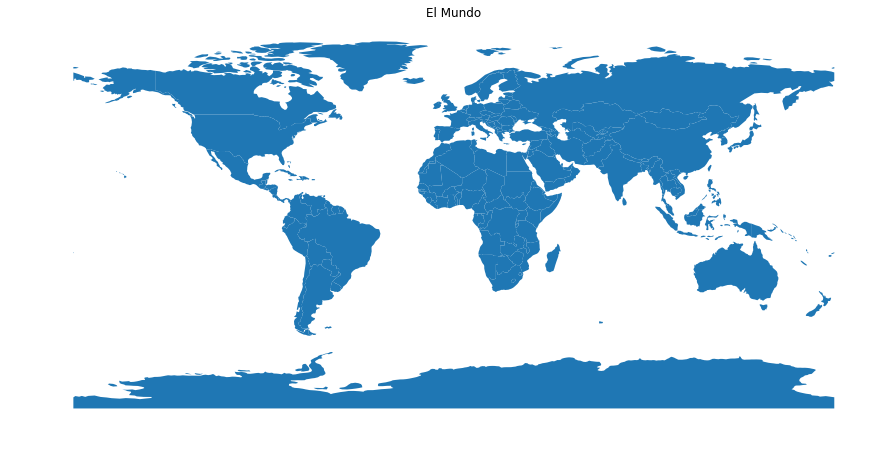

In [39]:
f, ax = plt.subplots(1, figsize=(15, 10))
ax.set_title('El Mundo')

# Carga la configuración que hayamos generado en el elemento ax
world.plot(ax=ax)

# Eliminamos los ejes
ax.set_axis_off()


### Mapas coropléticos

Un **mapa coroplético** es un mapa en el cual las regiones se dibujan con diferentes tonos de color que van de acuerdo a cierta estádistica, como por ejemplo su población, rangos de ingreso, etc.

Para elaborar un mapa coroplético, basta con indicar la columna sobre la cual se van a clasificar los datos, de esta manera, la gráfica generada presentará distintos tonos de color para cada región, acordes con los valores que se tienen en la columna indicada.

Ahora generamos una nueva columna que llamaremos **gdp_per_cap**, la cual resulta de dividir el valor de la columna **gdp_md_est**, entre el valor de la columna **pop_est**:

In [40]:
world = world[(world['pop_est']>0) & (world['name']!="Antarctica")] # Eliminamos Antarctica
world['gdp_per_cap'] = world['gdp_md_est'] / world['pop_est']
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",0.009093
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...,0.002791
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...,0.001503
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974...",0.046991
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49....",0.056823


Y finalmente se crea el mapa coroplético con base en el valor de la nueva columna creada:

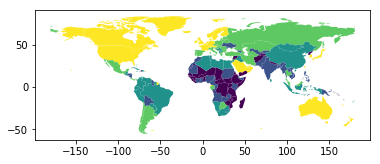

In [43]:
world.plot(column='gdp_per_cap', cmap='viridis', scheme='Quantiles') 

### Agregación usando `dissolve`

Es común que los datos espaciales que estemos manejando tengan un nivel de granularidad mayor del que necesitamos. Por ejemplo podemos tener información de los estratos a nivel de manzana en una ciudad, pero estamos interesados en estudiar patrones a nivel de UPZ, barrios o localidades. En caso de trabajar con datos no espaciales, la función **groupby** se ajusta a las necesidades mencionadas. Sin embargo, **GeoPandas** provee una función que agrega características geométricas a través de la función **dissolve**.

**dissolve** trabaja así: 
1. Si dos polígonos conjuntos comparten un grupo (Por ejemplo estrato), ambos son fusionados en un solo polígono o característica geométrica.
2. Los datos relacionados a cada polígono son agregados usando la función **groupby.aggregate()**
3. Combina tanto (1) como (2)

En el siguiente ejemplo combinaremos países para formar continentes y luego visualizaremos la información de población total, usando un mapa coroplético.

Primero leemos nuevamente el geodataframe, y lo modificamos para que solo contenga las columnas **continent**, **geometry** y **pop_est**:

In [44]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[['continent', 'geometry', 'pop_est']]
world.head(10)

,continent,geometry,pop_est
0,Oceania,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",920938
1,Africa,POLYGON ((33.90371119710453 -0.950000000000000...,53950935
2,Africa,POLYGON ((-8.665589565454809 27.65642588959236...,603253
3,North America,"(POLYGON ((-122.84 49.00000000000011, -122.974...",35623680
4,North America,"(POLYGON ((-122.84 49.00000000000011, -120 49....",326625791
5,Asia,"POLYGON ((87.35997033076265 49.21498078062912,...",18556698
6,Asia,"POLYGON ((55.96819135928291 41.30864166926936,...",29748859
7,Oceania,(POLYGON ((141.0002104025918 -2.60015105551566...,6909701
8,Asia,(POLYGON ((141.0002104025918 -2.60015105551566...,260580739
9,South America,(POLYGON ((-68.63401022758323 -52.636370458874...,44293293


Ahora usando la función **dissolve()**, definimos la columna mediante la cual se hará la agregación y la operación de agregación, para este caso agruparemos de acuerdo a la columna **continent** y la función de agregación será **sum** (sumatoria):

In [0]:
continents = world.dissolve(by='continent', aggfunc='sum')

El geodataframe resultado de la agregación es el que se muestra a continuación, en donde se consolidan los valores de la columna **pop_est** por continente:

In [46]:
continents

,geometry,pop_est
continent,,
Africa,(POLYGON ((49.54351891459575 -12.4698328589405...,1219176238
Antarctica,(POLYGON ((-163.7128956777287 -78.595667413241...,4050
Asia,(POLYGON ((120.2950142762069 -10.2586499976035...,4389144868
Europe,(POLYGON ((-51.65779741067889 4.15623240805302...,746398461
North America,"(POLYGON ((-61.68000000000001 10.76, -61.105 1...",573042112
Oceania,(POLYGON ((169.6678145693731 -43.5553256162263...,36782844
Seven seas (open ocean),"POLYGON ((68.935 -48.62500000000001, 69.58 -48...",140
South America,(POLYGON ((-66.95992000000001 -54.896810000000...,418540749


y sobre este nuevo geodataframe podemos diagramar el mapa coroplético:

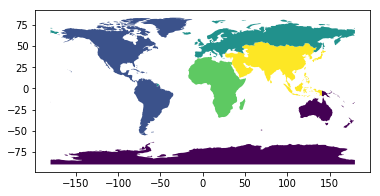

In [47]:
continents.plot(column = 'pop_est',cmap='viridis',  scheme='Fisher_Jenks')

### Fusionando datos

[Documentación](http://geopandas.org/mergingdata.html)

Existen dos maneras de combinar conjuntos de datos en geopandas. **Uniones de atributos** o **uniones espaciales**. 

En una unión de atributos, un **GeoSeries** o **GeoDataFrame** se combina con una Serie o DataFrame de pandas usando una variable en común. Esta operación es análoga a **pd.merge**, sin embargo si se hace usando pandas, el resultado será un DataFrame de pandas y no un **GeoDataFrame**.

En una unión espacial, todas las observaciones de un **GeoSeries** o **GeoDataFrame** son combinadas con base a una relación espacial establecida entre ellas. 

A continuación presentamos un ejemplo de una unión espacial, en un **GeoDataFrame** tenemos la información de las ciudades y en otro **GeoDataFrame** tenemos la información de los países. Usamos una unión espacial para fusionar ambas fuentes de datos:

Inicialmente obtenemos los dos geodataframes:

In [0]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [49]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


Tomamos las columnas que usaremos en el geodataframe **countries** y renombramos la columna **name** llamandola **country**:

In [0]:
countries = world[['geometry', 'name']]
countries = countries.rename(columns={'name':'country', 'geometry':'pais'})

In [51]:
countries.head()

,pais,country
0,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",Fiji
1,POLYGON ((33.90371119710453 -0.950000000000000...,Tanzania
2,POLYGON ((-8.665589565454809 27.65642588959236...,W. Sahara
3,"(POLYGON ((-122.84 49.00000000000011, -122.974...",Canada
4,"(POLYGON ((-122.84 49.00000000000011, -120 49....",United States of America


El siguiente es el contenido resultante para los dos geodataframes:

In [52]:
countries = countries.set_geometry('pais')
countries.head()


,pais,country
0,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",Fiji
1,POLYGON ((33.90371119710453 -0.950000000000000...,Tanzania
2,POLYGON ((-8.665589565454809 27.65642588959236...,W. Sahara
3,"(POLYGON ((-122.84 49.00000000000011, -122.974...",Canada
4,"(POLYGON ((-122.84 49.00000000000011, -120 49....",United States of America


In [53]:
countries.geometry.name

'pais'

In [54]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


Finalmente podemos realizar el **sjoin** de los dos geodataframes y ver el resultado:

In [55]:
cities_with_country = gpd.sjoin(cities, countries, how="inner", op='within',)

cities_with_country.head(30)

,name,geometry,index_right,country
0,Vatican City,POINT (12.45338654497177 41.90328217996012),141,Italy
1,San Marino,POINT (12.44177015780014 43.936095834768),141,Italy
192,Rome,POINT (12.481312562874 41.89790148509894),141,Italy
2,Vaduz,POINT (9.516669472907267 47.13372377429357),114,Austria
184,Vienna,POINT (16.36469309674374 48.20196113681686),114,Austria
3,Luxembourg,POINT (6.130002806227083 49.61166037912108),128,Luxembourg
8,Monaco,POINT (7.406913173465057 43.73964568785249),43,France
11,Andorra,POINT (1.51648596050552 42.5000014435459),43,France
199,Paris,POINT (2.33138946713035 48.86863878981461),43,France
12,Port-of-Spain,POINT (-61.51703088544974 10.65199708957726),175,Trinidad and Tobago


**IMPORTANTE**

**gpd.sjoin** también soporta varias funciones de unión aparte de **intersects**, como son por ejemplo: **within** y **contains**. Algunas de estas funciones vieron en el inciso  `Pruebas de relación`

### Ejemplo

Usando el dataframe mundial, ponga todo el mapa mundial en color gris y en color azul aquellos paises que tiene una población mayor a los 100 millones de personas.

In [56]:
path = gpd.datasets.get_path('naturalearth_lowres')
world_map = gpd.read_file(path)
world_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


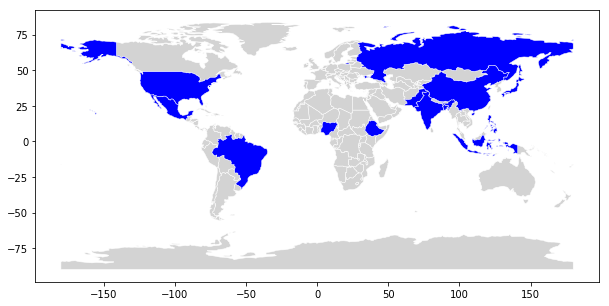

In [57]:
ax = world_map.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
world_map[world_map.pop_est>100000000].plot(ax=ax, color='blue', linewidth=0.5, edgecolor='white', figsize=(15,5))

## 4. Cargando datos georeferenciados

**IMPORTANTE:** Primero debe cargar el archivo **'bogota_catastral.json'** en su directorio de Colab. 
**gpd.read_file** regresa automáticamente un **GeoDataFrame**, el siguiente ejemplo lee un archivo json y muestra su cabecera:

In [0]:
df_bogota = gpd.read_file('bogota_cadastral.json')

In [59]:
df_bogota.head()

,cartodb_id,scacodigo,scatipo,scanombre,shape_leng,shape_area,MOVEMENT_ID,DISPLAY_NAME,geometry
0,12,004575,0,LOS LAURELES,0.027741,0.000037,1,"LOS LAURELES, 004575 (1)","(POLYGON ((-74.200295 4.617249, -74.2002849999..."
1,26,006524,0,LA MAGDALENA,0.053219,0.000089,2,"LA MAGDALENA, 006524 (2)","(POLYGON ((-74.16276000000001 4.660079, -74.16..."
2,45,102502,1,EL UVAL RURAL,0.171333,0.000708,3,"EL UVAL RURAL, 102502 (3)","(POLYGON ((-74.11930700000001 4.490175, -74.11..."
3,74,005501,0,PALO BLANCO,0.017187,0.000018,4,"PALO BLANCO, 005501 (4)","(POLYGON ((-74.09353299999999 4.681014, -74.09..."
4,77,009240,0,POTRERILLO,0.010527,0.000007,5,"POTRERILLO, 009240 (5)","(POLYGON ((-74.097435 4.735314, -74.096203 4.7..."


Podemos identificar en este **geodataframe**, la columna geometry que contiene los objetos a dibujar, también se puede dibujar el **geodataframe** de manera directa: 

In [60]:
df_bogota.geometry.name

'geometry'

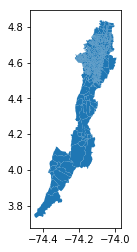

In [61]:
df_bogota.plot()

`GeoPandas` permite la indexación y selección de datos de la misma forma que pandas. Por ejemplo, si queremos filtrar aquellas áreas mayores a 0.0006, lo podemos hacer de la siguiente manera:

In [62]:
df_bogota_large = df_bogota[df_bogota['shape_area'] > 0.0006]
print(df_bogota_large.count())


cartodb_id      42
scacodigo       42
scatipo         42
scanombre       42
shape_leng      42
shape_area      42
MOVEMENT_ID     42
DISPLAY_NAME    42
geometry        42
dtype: int64


Como vemos son 42 los elementos que satisfacen la condición

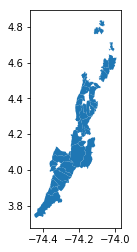

In [63]:
df_bogota_large.plot()